In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

## Infiltration values

This notebook has been created in order to address the question about how the infiltration values affect the possibility of establishing a system for artificial recharge to groundwater from flooding events.
To acchieve this objective, some soil hydraulic conductivity (*Ks*) values were obtained from the [NSW University](http://www.terragis.bees.unsw.edu.au/terraGIS_soil/sp_water-saturated_water_flow.html) in which different soil textural classes presented different *Ks* values.

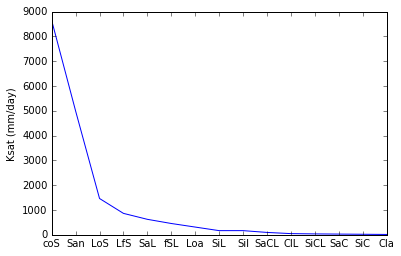

In [40]:
df=pd.read_csv(r'C:\Users\ifue3702\Downloads\soils Ks.csv', 
               skiprows =range(0,1),
               encoding = "ISO-8859-1",
               names=['Texture', 'Ks_mm_h', 'ks_class'])
df['Ks_mm_h']
df['Ksat_mm_day']=(df['Ks_mm_h']*24)
texture=['coS','San', 'LoS', 'LfS', 'SaL', 'fSL', 'Loa', 'SiL', 'Sil', 'SaCL', 'ClL', 'SiCL', 'SaC', 'SiC', 'Cla' ]
plt.xticks(df.index, texture)
plt.plot(df.index, df['Ksat_mm_day'])
plt.ylabel('Ksat (mm/day)')
plt.show()


By assuming a constant area of 1 m<sup>2</sup> at saturation, it
should operate Darcy's law:

$v = Ks\frac{\delta h}{\delta l}$

where $\frac{\delta h}{\delta l}$ is known as the hydraulic gradient, which involve the change in water high (m) through the *l* distance (m). The result is in terms of velocity, but by multiplying the equation for the transversal seccion (area) is posible to obtain the discharge rate.
In this case, the discharge rate is equal to the velocity of flow, but with different units.
The calculation was considered changing the height of the water column to infiltrate from 10 m to 0 m, and assuming that the infiltration column discharged freely into the water table (unconfined aquifer) which is located 10 meters below the surface.
Besides, a mean anual evaporation of 5.725221 mm d<sup>-1</sup> was summed to the infiltration values considering it as other water loss.

In [16]:
text=list(df['Texture'])
a='Q_h'
text.insert(0,a)
water_depth=range(0,11)
depth_gw=10
#create hydraulic gradient function
def hydraulic_grad (water_depth, depth_gw):
    return (water_depth+10)/depth_gw
#Discharge (m3/d) at different hydraulic gradients
for i in water_depth:
    df['Q'+str(i)] = hydraulic_grad(water_depth[i], depth_gw)*df.Ksat_mm_day
df_trans=df.transpose() #transpose dataframe
df_trans.to_csv('C:\\Users\\ifue3702\\Documents\\Python Scripts\\learning\\ks_text.csv')
ot_df=pd.read_csv('C:\\Users\\ifue3702\\Documents\\Python Scripts\\learning\\ks_text.csv', 
                  skiprows=range(0,5),
                  index_col=False,
                  names=text)
graph_df=ot_df
graph_df=ot_df.drop('Q_h',1)
graph_df['water_depth']=graph_df.index*1000


## Plotting infiltration values + Evaporation values v/s water depth

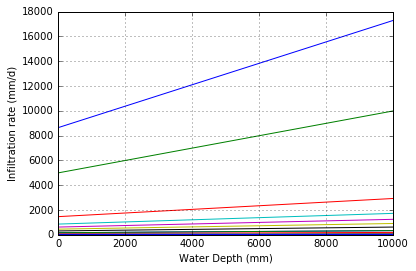

In [17]:
graph_df['Mean_evap']=5.725221
text.remove('Q_h')
for i in text:
    graph_df[str(i)+'_losses']=graph_df[i]+graph_df.Mean_evap
for i in text:
    plt.plot(graph_df['water_depth'],graph_df[i])
plt.xlabel('Water Depth (mm)')
plt.ylabel('Infiltration rate (mm/d)')
plt.grid(which='both')
plt.show()

#http://www.fao.org/docrep/s8684e/s8684e0a.htm
#http://pubs.usgs.gov/wsp/1544f/report.pdf

In [39]:
inf_rate=graph_df.ix[1,0:15]
inf_list=inf_rate.tolist()